In [2]:
#imports
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import seaborn as sns
%matplotlib inline

from __future__ import division

In [3]:
#Importer la frame

path = '../data/merge.csv'
df = pd.read_csv(path, index_col=0)

#Pour plus de simplicité dans le traitement des codes de département, on rassemble la Corse en un code (20)
df.dep = df.dep.apply(lambda x: x.replace('2A', '20').replace('2B', '20'))

#ligne aberrante à supprimer
df = df[df.l_EG != 198.67]

In [4]:
#on stocke les variables d'entrée dans X et de sortie dans y. yc indique le groupe ayant le score de législatives le + élevé
#p_win stocke le groupe politique ayant eu le score de présidentielle le plus élevé dans le département
X = df[df.columns[:-6]]
p_win = df[df.columns[-12:-6]].idxmax(axis=1)
y = df[df.columns[-6:]]
yc = y.idxmax(axis=1)

In [5]:
#stock dans des cols plutôt non ?
df['p_win'] = p_win
df['l_win'] = yc

In [6]:
groups = ['EG', 'G', 'autre', 'C', 'D', 'ED']
lgroups = ['l_%s' % g for g in groups]
pgroups = ['presid_%s' % g for g in groups]
color = ['#ca0020', '#f4a582', '#b2abd2', '#fee8c8', '#92c5de', '#0571b0']

(array([ 459.,  750.,  558.,  366.,  446.,  385.,  113.,   64.,  120.,  138.]),
 array([   72763. ,   327218.6,   581674.2,   836129.8,  1090585.4,
         1345041. ,  1599496.6,  1853952.2,  2108407.8,  2362863.4,
         2617319. ]),
 <a list of 10 Patch objects>)

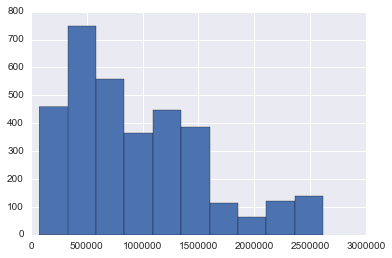

In [7]:
plt.hist(df['pop'])

(array([ 3055.,     0.,   122.,    63.,    39.,     0.,     0.,     0.,
            0.,   120.]),
 array([  2.00000000e+00,   2.13570000e+03,   4.26940000e+03,
          6.40310000e+03,   8.53680000e+03,   1.06705000e+04,
          1.28042000e+04,   1.49379000e+04,   1.70716000e+04,
          1.92053000e+04,   2.13390000e+04]),
 <a list of 10 Patch objects>)

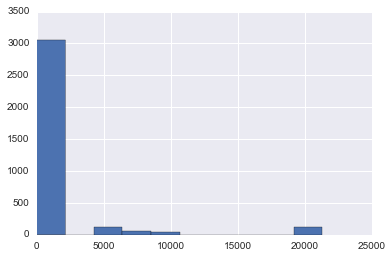

In [8]:
plt.hist(df.dens)

In [9]:
#La barre de droite correspond à Paris
df[df.dens > 15000].dep.unique()

array(['75'], dtype=object)

In [10]:
#Les barres du milieu à sa banlieue
df[(4000 < df.dens) & (df.dens < 11000)].dep.unique()

array(['92', '93', '94'], dtype=object)

(array([ 1277.,   850.,   371.,   123.,   182.,    68.,   118.,    10.,
           18.,    38.]),
 array([   2. ,   99.9,  197.8,  295.7,  393.6,  491.5,  589.4,  687.3,
         785.2,  883.1,  981. ]),
 <a list of 10 Patch objects>)

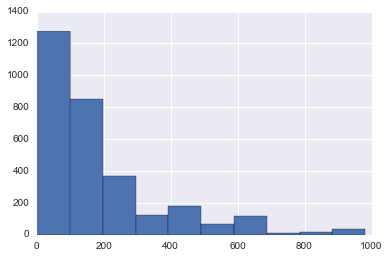

In [11]:
#zoom sur la première bin
plt.hist(df[df.dens < 3000].dens)

In [12]:
ages = ['age_%d' % i for i in range(1,5)]

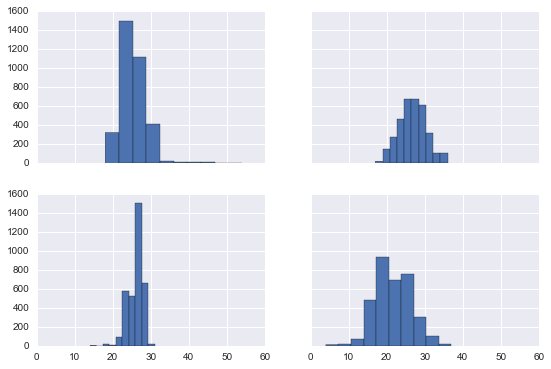

In [13]:
f, axarr= plt.subplots(2,2, sharex=True, sharey=True)
f.set_size_inches(9, 6)

for i in range(4):
    plt.sca(axarr.flat[i])
    plt.hist(df[ages[i]])

(array([  322.,  1494.,  1112.,   414.,    22.,    16.,     9.,     8.,
            0.,     2.]),
 array([ 18. ,  21.6,  25.2,  28.8,  32.4,  36. ,  39.6,  43.2,  46.8,
         50.4,  54. ]),
 <a list of 10 Patch objects>)

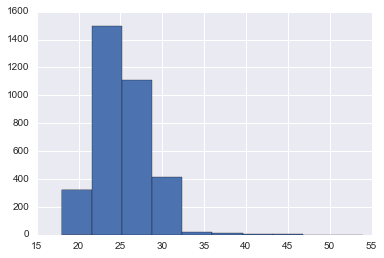

In [14]:
#La distribution la plus étendue semble être age_1
plt.hist(df.age_1)

In [15]:
#+ de la moitié de la population en dessous de 20 ans à Mayotte cette année
df[(50.4 <= df.age_1) & (df.age_1 <= 54)]

,dep,circ,year,pop,dens,age_1,age_2,age_3,age_4,etud,...,presid_G,presid_autre,l_C,l_D,l_ED,l_EG,l_G,l_autre,p_win,l_win
3398,976,1.0,2017.0,235132.0,625.0,54.0,27.0,14.0,4.0,0.67,...,4.33,2.27,0.00,30.19,3.04,1.96,50.11,14.68,presid_D,l_G
3399,976,2.0,2017.0,235132.0,625.0,54.0,27.0,14.0,4.0,0.67,...,4.33,2.27,12.03,42.05,1.09,2.14,13.85,28.84,presid_D,l_D


(array([  485.,  1420.,   997.,   336.,    59.,     0.,    12.,    38.,
           23.,    29.]),
 array([  4.38 ,   6.837,   9.294,  11.751,  14.208,  16.665,  19.122,
         21.579,  24.036,  26.493,  28.95 ]),
 <a list of 10 Patch objects>)

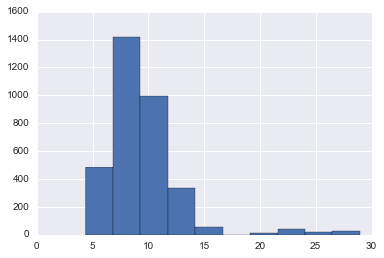

In [16]:
plt.hist(df.chom)

In [17]:
#Les départements d'outre-mer présentent un chômage particulier
df[df.chom > 19].dep.unique()

array(['971', '973', '974', '972', '976'], dtype=object)

(array([   16.,    55.,   147.,   392.,  1348.,  1007.,   402.,    24.,
            6.,     2.]),
 array([ 45.9 ,  46.45,  47.  ,  47.55,  48.1 ,  48.65,  49.2 ,  49.75,
         50.3 ,  50.85,  51.4 ]),
 <a list of 10 Patch objects>)

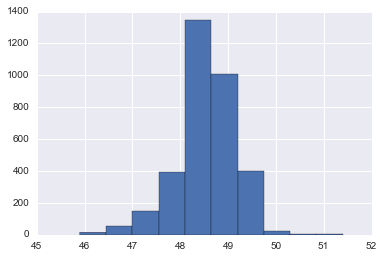

In [19]:
plt.hist(df.hf)

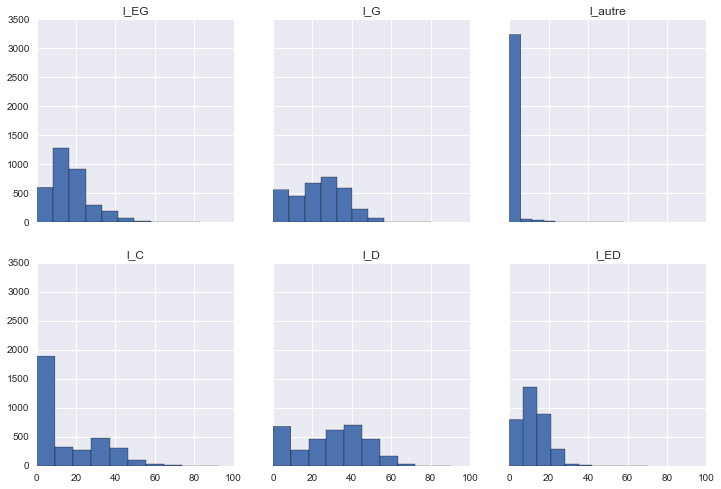

In [22]:
f, axarr = plt.subplots(2,3, sharex=True, sharey=True)
f.set_size_inches(12,8)

for i in range(6):
    plt.sca(axarr.flat[i])
    plt.hist(df[lgroups[i]])
    plt.title(lgroups[i])

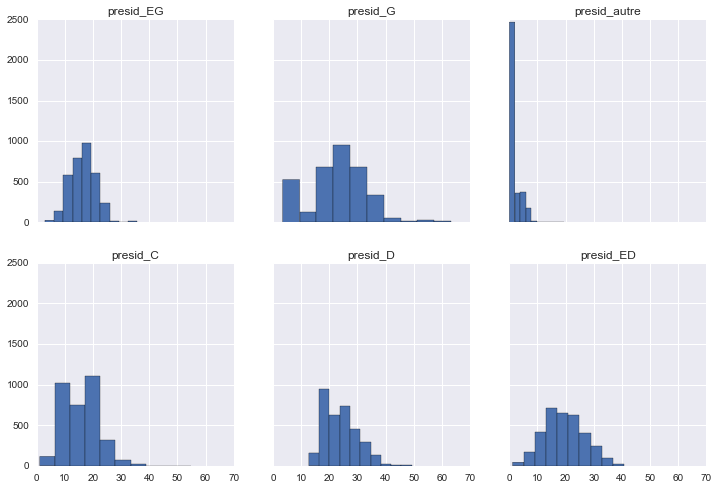

In [23]:
f, axarr = plt.subplots(2,3, sharex=True, sharey=True)
f.set_size_inches(12,8)

for i in range(6):
    plt.sca(axarr.flat[i])
    plt.hist(df[pgroups[i]])
    plt.title(pgroups[i])